In [261]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm

import warnings
warnings.filterwarnings("ignore")

In [76]:
data = pd.read_csv('data.csv')
data

,url,title,type,genres,releaseYear,imdbId,imdbAverageRating,imdbNumVotes,availableCountries
0,https://www.netflix.com/title/60000724,Forrest Gump,movie,"Drama, Romance",1994.0,tt0109830,8.8,2313221.0,MX
1,https://www.netflix.com/title/1154386,The Fifth Element,movie,"Action, Adventure, Sci-Fi",1997.0,tt0119116,7.6,516523.0,"AT, CH, DE"
2,https://www.netflix.com/title/60031236,Kill Bill: Vol. 1,movie,"Action, Crime, Thriller",2003.0,tt0266697,8.2,1220488.0,"AE, AL, AO, AT, AU, AZ, BG, BH, BY, CA, CI, CM..."
3,https://www.netflix.com/title/70021659,Jarhead,movie,"Biography, Drama, War",2005.0,tt0418763,7.0,211314.0,"AD, AE, AG, AL, AO, AR, AT, AZ, BA, BB, BE, BG..."
4,https://www.netflix.com/title/1080395,Unforgiven,movie,"Drama, Western",1992.0,tt0105695,8.2,443310.0,"AU, BA, BE, BG, CZ, HR, HU, MD, ME, MK, NZ, PL..."
...,...,...,...,...,...,...,...,...,...
15855,NaN,NaN,tv,"Drama, Mystery",NaN,NaN,NaN,NaN,"AD, AE, AG, AL, AO, AR, AT, AU, AZ, BA, BB, BE..."
15856,NaN,NaN,tv,NaN,2024.0,NaN,NaN,NaN,"HK, ID, IN, KR, MY, PH, SG, TH"
15857,NaN,NaN,tv,NaN,2024.0,NaN,NaN,NaN,"AL, AO, AU, AZ, BA, BB, BG, BM, BS, BY, BZ, CA..."
15858,NaN,NaN,tv,NaN,NaN,NaN,NaN,NaN,"AG, AO, AR, AU, BB, BM, BO, BS, BZ, CA, CI, CL..."


* Removendo Dados Nulos

In [77]:
data = data.dropna(subset=['title'])

In [78]:
data = data.dropna(subset=['imdbAverageRating','imdbNumVotes'])

* Removendo Coluna "imdbId"

In [79]:
data = data.drop('imdbId', axis=1)

* Checando se ainda há dados nulos

In [80]:
data.isnull().sum()

url                   8437
title                    0
type                     0
genres                   0
releaseYear              0
imdbAverageRating        0
imdbNumVotes             0
availableCountries       0
dtype: int64

In [110]:
data = data.reset_index()

## Análise dos Dados

* Analisando a quantidade de filmes e séries

In [81]:
data['type'].replace({'movie':'filme', 'tv':'serie'}, inplace=True)

In [82]:
tipos = data['type'].value_counts()
tipos

filme    11043
serie     4091
Name: type, dtype: int64

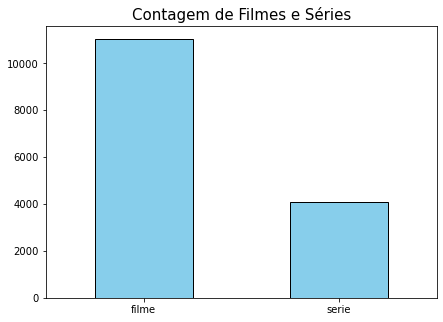

In [83]:
tipos.plot(kind='bar', edgecolor='k', color='skyblue', figsize=(7,5))
plt.title('Contagem de Filmes e Séries', size=15)
plt.xticks(rotation=0)
plt.show()

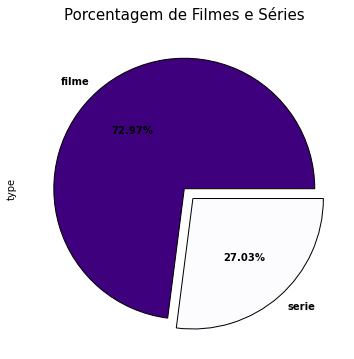

In [102]:
plt.figure(figsize=(8,6))
tipos.plot(kind='pie', autopct='%1.2f%%', cmap='Purples_r', wedgeprops={'edgecolor':'black'}, 
           textprops={'fontweight': 'bold'}, explode=[0,0.1])
plt.title('Porcentagem de Filmes e Séries', size=15)
plt.show()

* Analisando quantos conteúdos possuem URL's

In [117]:
com_urls = data['url'].notna().sum()
sem_urls = data['url'].isnull().sum()

In [121]:
valores = [com_urls, sem_urls]
labels = ['Conteúdo com URL', 'Conteúdo sem URL']

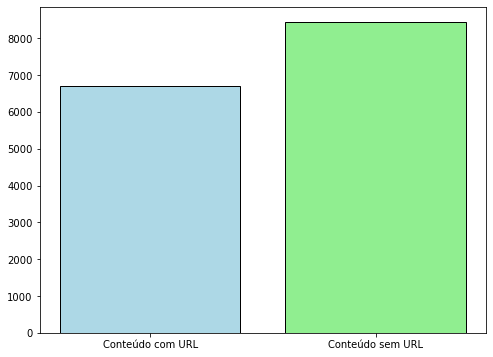

In [127]:
plt.figure(figsize=(8,6))
plt.bar(labels, valores, color=['lightblue','lightgreen'], edgecolor='k')
plt.show()

* Distribuição dos gêneros dos conteúdos

In [136]:
data['genero_principal'] = data['genres'].str.split(',').str[0]

In [146]:
generos = data['genero_principal'].value_counts().head(10)

<AxesSubplot:ylabel='genero_principal'>

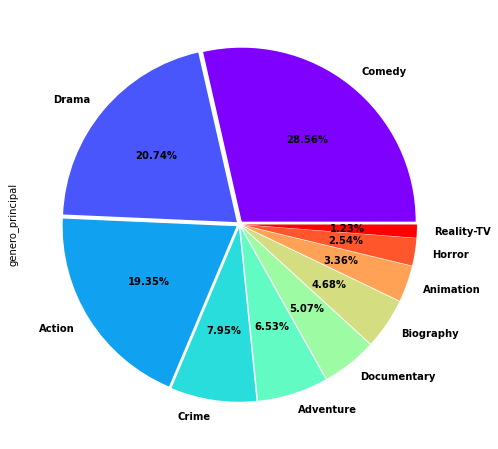

In [158]:
plt.figure(figsize=(12,8))
generos.plot(kind='pie', cmap='rainbow', autopct='%1.2f%%', textprops={'fontweight':'bold'}, 
            explode=[0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02])

* Análise de lançamento de conteúdos ao longo dos anos

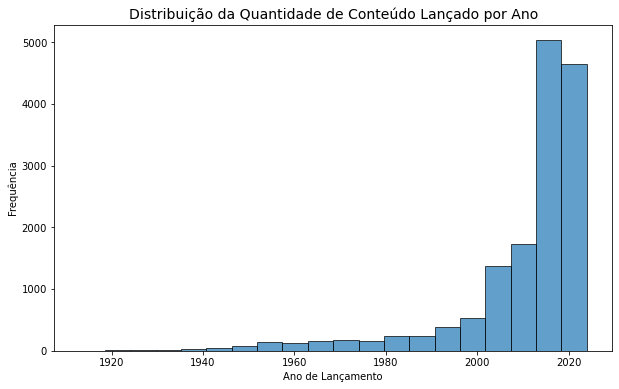

In [185]:
plt.figure(figsize=(10,6))
data['releaseYear'].hist(bins=20, edgecolor='black', alpha=0.7)
plt.grid(False)
plt.title('Distribuição da Quantidade de Conteúdo Lançado por Ano', size=14)
plt.xlabel('Ano de Lançamento')
plt.ylabel('Frequência')
plt.show()

* Distribuição das Notas dos Conteúdos no IMDB

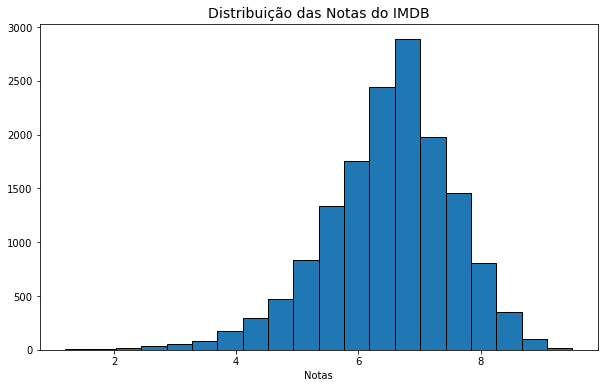

In [194]:
plt.figure(figsize=(10,6))
data['imdbAverageRating'].hist(bins=20, edgecolor='black')
plt.grid(False)
plt.title('Distribuição das Notas do IMDB', size=14)
plt.xlabel('Notas')
plt.show()

**Análise dos filmes com maiores notas**

In [225]:
filmes = data.loc[data.type == 'filme']

In [236]:
index = list(filmes['imdbAverageRating'].sort_values(ascending=False).head(20).index)

lista_filmes = []

for i in index:
    titulo = data.loc[i].title
    lista_filmes.append(titulo)

In [237]:
notas = list(filmes['imdbAverageRating'].sort_values(ascending=False).head(20).values)

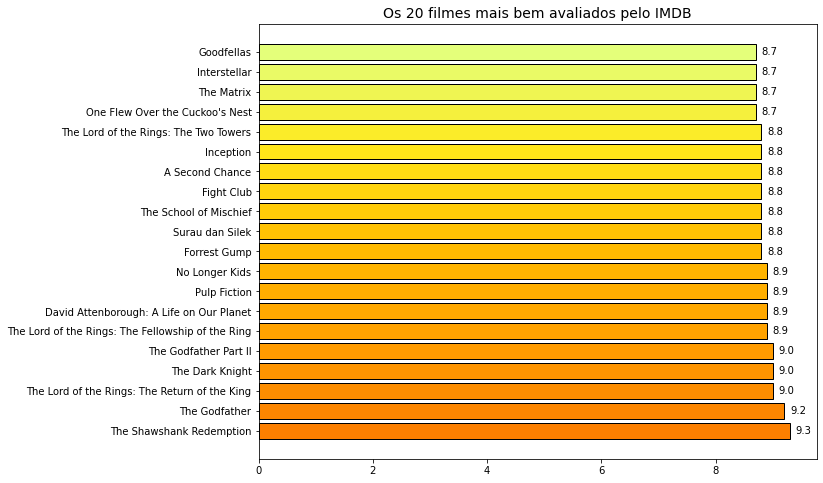

In [277]:
plt.figure(figsize=(10,8))

# configura a paleta de cores
cmap = cm.get_cmap('Wistia_r', len(notas))
cores = cmap(np.linspace(0,1,len(notas)))

# adiciona os valores no gráfico de cada nota para cada filme
for i, valor in enumerate(notas):
    plt.text(valor + 0.1, i, str(valor), va='center')

plt.barh(lista_filmes, notas, color=cores, edgecolor='k')
plt.title('Os 20 filmes mais bem avaliados pelo IMDB', size=14)
plt.show()

**Análise das séries com maiores notas**

In [278]:
series = data.loc[data.type == 'serie']

In [293]:
idx = series.imdbAverageRating.sort_values(ascending=False).head(16).index

lista_series = []

for i in idx:
    serie = data.loc[i].title
    lista_series.append(serie)

In [295]:
notas_series = series.imdbAverageRating.sort_values(ascending=False).head(16).values

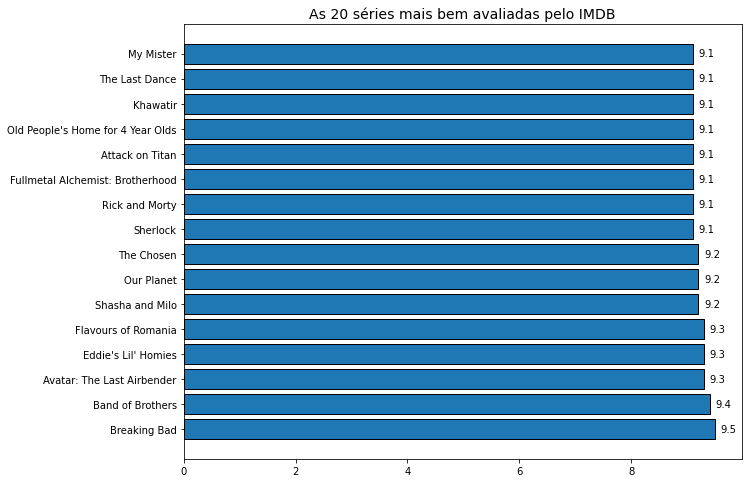

In [302]:
plt.figure(figsize=(10,8))

for i, valor in enumerate(notas_series):
    plt.text(valor + 0.1, i, str(valor), va='center')
    
plt.barh(lista_series, notas_series, edgecolor='k')
plt.title('As 20 séries mais bem avaliadas pelo IMDB', size=14)
plt.show()

**Os conteúdos com mais avaliações no IMDB**

In [318]:
indices = data['imdbNumVotes'].sort_values(ascending=False).head(10).index

In [320]:
num_avaliacoes = data['imdbNumVotes'].sort_values(ascending=False).head(10).values

In [321]:
titulos = []

for i in indices:
    a = data.loc[i].title
    titulos.append(a)

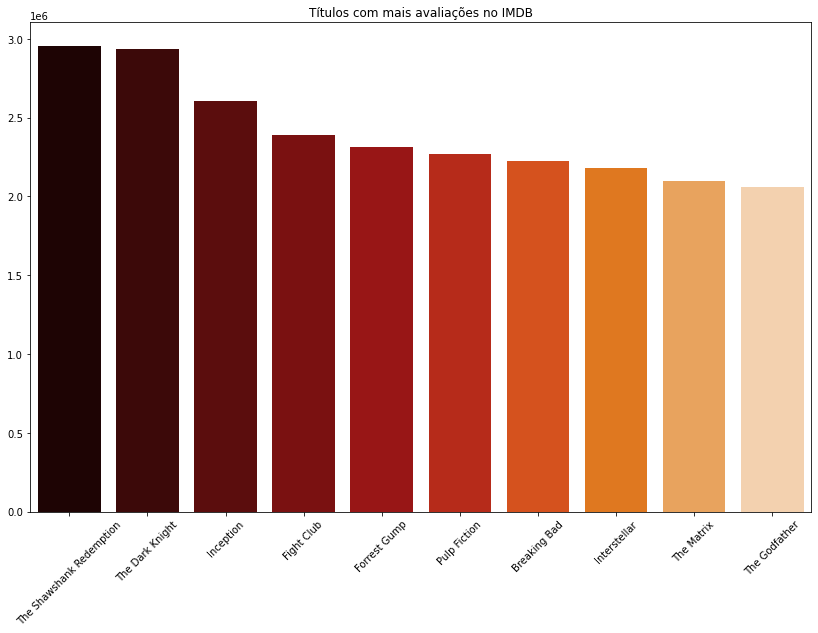

In [333]:
plt.figure(figsize=(14,9))
sns.barplot(x=titulos, y=num_avaliacoes, palette='gist_heat')
plt.xticks(rotation=45)
plt.title('Títulos com mais avaliações no IMDB')
plt.show()

**Gêneros que mais evoluiram com o tempo**

In [443]:
drama = data.loc[data.genero_principal == 'Drama']

In [448]:
anos_drama = drama[['genero_principal','releaseYear']].groupby('releaseYear').count().genero_principal.index
valores_drama = drama[['genero_principal','releaseYear']].groupby('releaseYear').count().genero_principal.values

In [449]:
comedia = data.loc[data.genero_principal == 'Comedy']

In [450]:
anos_comedia = comedia[['genero_principal','releaseYear']].groupby('releaseYear').count().genero_principal.index
valores_comedia = comedia[['genero_principal','releaseYear']].groupby('releaseYear').count().genero_principal.values

In [451]:
acao = data.loc[data.genero_principal == 'Action']

In [452]:
anos_acao = acao[['genero_principal','releaseYear']].groupby('releaseYear').count().genero_principal.index
valores_acao = acao[['genero_principal','releaseYear']].groupby('releaseYear').count().genero_principal.values

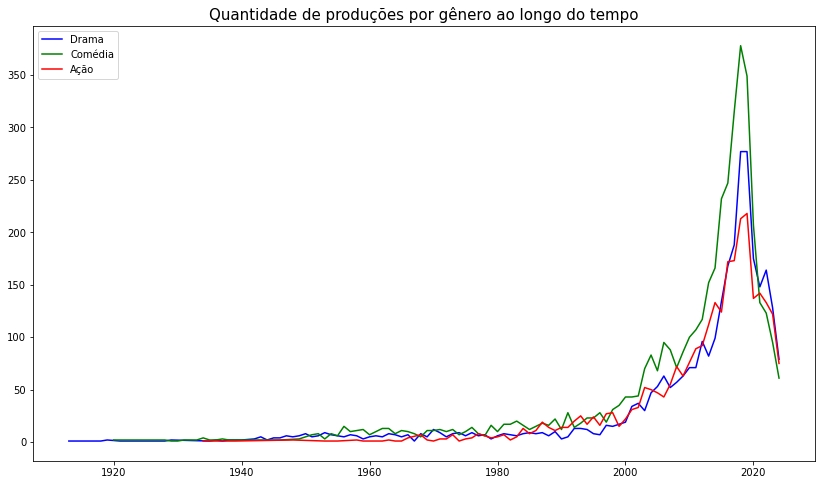

In [494]:
plt.figure(figsize=(14,8))
plt.plot(anos_drama, valores_drama, color='blue', label='Drama')
plt.plot(anos_comedia, valores_comedia, color='green', label='Comédia')
plt.plot(anos_acao, valores_acao, color='red', label='Ação')
plt.legend()
plt.title('Quantidade de produções por gênero ao longo do tempo', size=15)
plt.show()